## Basic EDA 

In [63]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [64]:

data = pd.read_csv('Ship_Performance_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [65]:
data.describe()

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


## Checking if we have nulls

In [66]:
data.isnull().sum()
# all the null cols are categoricals
# 136 values are null across multiple cols maybe multiple cols are missing from each row
# maybe we can drop entire rows

Date                         0
Ship_Type                  136
Route_Type                 136
Engine_Type                136
Maintenance_Status         136
Speed_Over_Ground_knots      0
Engine_Power_kW              0
Distance_Traveled_nm         0
Draft_meters                 0
Weather_Condition          136
Cargo_Weight_tons            0
Operational_Cost_USD         0
Revenue_per_Voyage_USD       0
Turnaround_Time_hours        0
Efficiency_nm_per_kWh        0
Seasonal_Impact_Score        0
Weekly_Voyage_Count          0
Average_Load_Percentage      0
dtype: int64

In [67]:
data[data['Weather_Condition'].isnull()]

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
42,2024-03-24,Tanker,NaN,Steam Turbine,Critical,19.089416,1095.239837,1801.174941,14.086731,NaN,858.101319,70720.333931,382123.585132,66.853774,0.776208,0.793401,3,85.878674
74,2023-10-01,Bulk Carrier,Transoceanic,Heavy Fuel Oil (HFO),Critical,22.949940,2568.998563,582.166633,13.400490,NaN,501.491193,93327.176874,652250.187012,50.697667,0.189981,0.861327,3,81.625319
78,2023-10-29,Tanker,Coastal,Heavy Fuel Oil (HFO),Fair,18.422572,1904.895348,554.369555,9.785255,NaN,1540.228201,194093.867868,544245.316378,55.932759,0.981803,1.017615,8,95.604001
90,2024-01-21,Fish Carrier,Coastal,Diesel,Critical,18.753945,534.791039,1809.769934,5.063586,NaN,1580.033240,126607.271830,900331.905739,31.199723,0.292464,0.595344,2,57.814421
91,2024-01-28,Fish Carrier,Long-haul,Diesel,Critical,22.531218,994.067908,1324.918486,14.294956,NaN,1764.394339,488014.683924,947163.626950,20.974100,1.307224,1.133619,1,75.011325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,2023-07-23,Fish Carrier,Coastal,Steam Turbine,Fair,14.808014,2855.892244,1286.381915,5.160442,NaN,1696.784244,386430.936973,442809.166689,60.468399,1.298961,1.490937,2,67.914612
2697,2023-10-08,Bulk Carrier,Short-haul,Diesel,Fair,22.010813,980.448400,1394.626160,7.141356,NaN,468.312089,341002.621623,499189.678463,63.247105,0.812614,1.380407,8,90.806599
2715,2024-02-11,Fish Carrier,Transoceanic,Diesel,Fair,16.108466,2811.022082,804.239962,10.795343,NaN,1176.790300,129790.538157,703651.140757,70.353526,1.370604,1.249437,3,85.678347
2732,2024-06-09,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,13.852798,2161.282358,831.355653,14.612775,NaN,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155


In [68]:
data[data['Ship_Type'].isnull()]
# the nulls are dispersed so cannot drop entire rows

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
8,2023-07-30,NaN,Coastal,Heavy Fuel Oil (HFO),Good,17.309362,1179.018805,429.564313,6.002358,Moderate,1953.447929,346071.519942,448682.864128,14.451820,0.977448,0.764914,8,50.247060
22,2023-11-05,NaN,Coastal,Heavy Fuel Oil (HFO),Good,18.754870,1305.423686,354.599675,8.052450,Calm,1725.687770,14878.151924,902159.371696,31.406581,0.930002,0.864772,2,89.546126
24,2023-11-19,NaN,Coastal,Diesel,Good,18.069011,2922.282582,559.861349,10.417704,Calm,1741.081025,333900.581735,848139.264094,20.006238,0.699553,1.164695,4,58.541232
26,2023-12-03,NaN,Coastal,Heavy Fuel Oil (HFO),Critical,20.994958,2296.329786,275.187105,7.124895,Calm,53.516553,114527.880930,506111.037748,52.774581,0.243271,0.757688,1,66.678393
61,2023-07-02,NaN,Short-haul,Steam Turbine,Fair,22.234745,1410.198699,1163.576296,9.555535,Rough,94.726163,256534.740657,454223.301498,49.875138,1.243155,0.862299,9,80.209144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,2024-06-02,NaN,Transoceanic,Heavy Fuel Oil (HFO),Fair,14.339485,579.015170,1937.638911,12.712176,Calm,524.204024,300632.396512,511493.283613,26.926088,1.036168,1.364926,8,86.639690
2679,2023-06-04,NaN,Coastal,Steam Turbine,Fair,16.238114,2274.812065,338.048493,5.502260,Rough,1442.489639,170068.803091,434539.452635,58.648966,1.010171,1.258953,3,93.528073
2684,2023-07-09,NaN,Long-haul,Heavy Fuel Oil (HFO),Critical,16.738158,1319.427369,1635.251855,5.193324,Moderate,1396.971824,165613.074391,784103.830148,52.336626,0.917655,0.648691,1,89.172367
2702,2023-11-12,NaN,Coastal,Diesel,Good,16.863410,2396.514301,1859.692262,5.595265,Rough,755.505988,318293.988764,902140.534774,18.084346,1.134419,1.453068,6,50.943220


In [ ]:
missing_cols=data.columns[data.isnull().any()].to_list()
for col in missing_cols:
    print(data[col].value_counts())
    print('\n')
    

Ship_Type
Bulk Carrier      669
Fish Carrier      653
Tanker            643
Container Ship    635
Name: count, dtype: int64


Route_Type
Long-haul       686
Coastal         650
Transoceanic    638
Short-haul      626
Name: count, dtype: int64


Engine_Type
Diesel                  892
Steam Turbine           855
Heavy Fuel Oil (HFO)    853
Name: count, dtype: int64


Maintenance_Status
Good        873
Fair        867
Critical    860
Name: count, dtype: int64


Weather_Condition
Calm        893
Moderate    891
Rough       816
Name: count, dtype: int64




## Removing Nulls

In [30]:
for col in missing_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\Zehra\AppData\Local\Temp\ipykernel_19176\3927105146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [31]:
data.isnull().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

## Encoding

### Detecting nominal and ordinal cols

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2736 non-null   object 
 2   Route_Type               2736 non-null   object 
 3   Engine_Type              2736 non-null   object 
 4   Maintenance_Status       2736 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2736 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [40]:
# Ordinal Mapping
maintenance_map = {'Critical': 0, 'Fair': 1, 'Good': 2}
data['Maintenance_Status'] = data['Maintenance_Status'].map(maintenance_map)


In [46]:
# Label Encoding for Nominal
for col in ['Ship_Type', 'Route_Type', 'Engine_Type', 'Weather_Condition']:
    data[col] = LabelEncoder().fit_transform(data[col])

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2736 non-null   int64  
 2   Route_Type               2736 non-null   int64  
 3   Engine_Type              2736 non-null   int64  
 4   Maintenance_Status       2736 non-null   int64  
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2736 non-null   int64  
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

## Scaling

In [49]:
selected_features = [
    'Operational_Cost_USD',
    'Revenue_per_Voyage_USD',
    'Efficiency_nm_per_kWh',
    'Engine_Power_kW',
    'Cargo_Weight_tons',
    'Average_Load_Percentage',
    'Turnaround_Time_hours',
    'Distance_Traveled_nm',
    'Maintenance_Status',
    'Route_Type',
    'Engine_Type'
]


In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[selected_features])

In [52]:
X_scaled

array([[ 1.62346534, -0.84517278,  1.6270068 , ..., -1.27858008,
        -0.41953222,  0.0764413 ],
       [ 1.62031086,  1.3364839 , -1.259663  , ...,  1.14651184,
         0.49727302,  1.28536264],
       [ 1.37294876, -0.4696207 , -0.74113795, ..., -0.06603412,
        -0.41953222, -1.13248004],
       ...,
       [-1.25127155, -1.059299  , -0.506763  , ..., -1.27858008,
         0.49727302,  1.28536264],
       [-1.6320749 ,  1.0265141 ,  0.24042164, ...,  1.14651184,
         1.41407826,  0.0764413 ],
       [-1.41966055, -0.51317667,  0.06615164, ..., -0.06603412,
        -1.33633747,  1.28536264]], shape=(2736, 11))

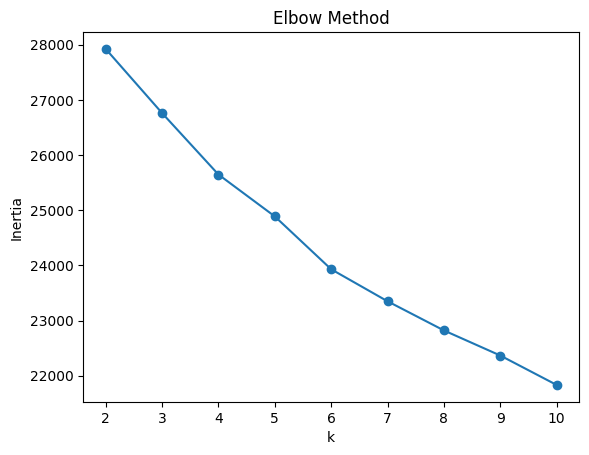

Silhouette Score for k=2: 0.0721
Silhouette Score for k=3: 0.0591
Silhouette Score for k=4: 0.0607
Silhouette Score for k=5: 0.0588
Silhouette Score for k=6: 0.0654
Silhouette Score for k=7: 0.0643
Silhouette Score for k=8: 0.0647
Silhouette Score for k=9: 0.0645
Silhouette Score for k=10: 0.0666


In [55]:

inertias = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Elbow Plot
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Silhouette Scores
for i, score in enumerate(silhouette_scores, start=2):
    print(f'Silhouette Score for k={i}: {score:.4f}')


In [61]:
optimal_k = 2 # replace with what you choose
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)
    

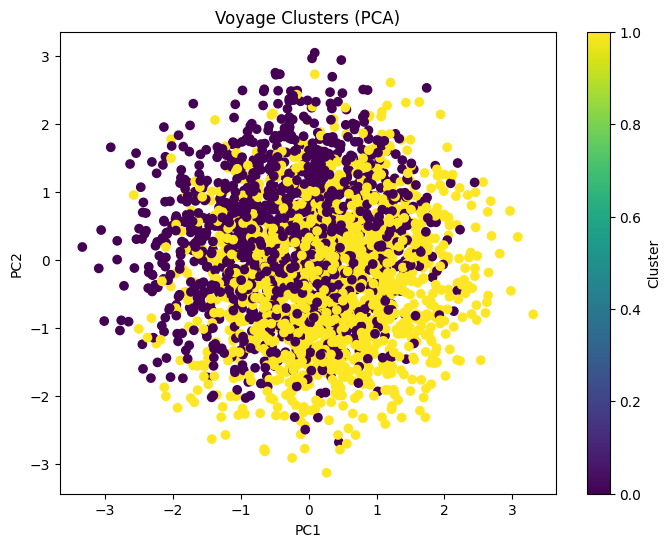

In [62]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Voyage Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
